In [1]:
import numpy as np
import scipy

In [2]:
def gradient(gradient_f,values):
    grad = []
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
#     print('gradient--->',grad)
    return np.array(grad)
    

In [3]:
def descent_direction(gradient_f,values):
    grad = gradient(gradient_f,values)
    grad_square = np.array([g*g for g in grad])
#     print('grad square calculated ---> {}'.format(grad_square))
    p =  -np.sum(grad_square)
    return p

In [5]:
def armijo_step_algorithm(f,gradient,negative_grad,values,delta):
    ro = 1
    eta = 2
    descent = descent_direction(gradient,values)
    while f(*(values+ro*negative_grad)) <= f(*values)+ro*delta*descent:
        ro *= 2
    
    while f(*(values+eta*ro*negative_grad)) > f(*values)+eta*ro*delta*descent:
        ro /= 2
    return ro

In [6]:
# f = lambda x,y : 100*(y-x*x)**2 + (1-x*x)
# dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
# dfy = lambda x,y: 200*(y-x*x)
f = lambda x,y : 4*x*x+y*y
dfx = lambda x,y: 8*x+y*0
dfy = lambda x,y: 2*y+x*0
negative_grad = gradient(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

6.938893903907228e-18


In [7]:
print(dfx(1,1))
print(dfy(1,1))

8
2


In [8]:
from numpy import linalg as LA
def general_descent(accuracy,function,gradient_f,initial):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-4)
    while counter <=10:
        print(LA.norm(gradient(gradient_f,xk)))
        dk = -gradient(gradient_f,xk)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = xk1
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
#         if LA.norm(xk1-xk)> 0:
#             break
    return xk1

In [9]:
general_descent(10,f,np.array([dfx,dfy]),np.array([1,2]))

8.94427190999916
xk1 at iterate: 0--->: [0.  1.5]
dk at iterate: 0--->: [-8 -4]
step_size at iterate: 0--->: 0.125
3.0
xk1 at iterate: 1--->: [0.   0.75]
dk at iterate: 1--->: [-0. -3.]
step_size at iterate: 1--->: 0.25
1.5
xk1 at iterate: 2--->: [0.    0.375]
dk at iterate: 2--->: [-0.  -1.5]
step_size at iterate: 2--->: 0.25
0.75
xk1 at iterate: 3--->: [0.     0.1875]
dk at iterate: 3--->: [-0.   -0.75]
step_size at iterate: 3--->: 0.25
0.375
xk1 at iterate: 4--->: [0.      0.09375]
dk at iterate: 4--->: [-0.    -0.375]
step_size at iterate: 4--->: 0.25
0.1875
xk1 at iterate: 5--->: [0.       0.046875]
dk at iterate: 5--->: [-0.     -0.1875]
step_size at iterate: 5--->: 0.25
0.09375
xk1 at iterate: 6--->: [0.        0.0234375]
dk at iterate: 6--->: [-0.      -0.09375]
step_size at iterate: 6--->: 0.25
0.046875
xk1 at iterate: 7--->: [0.         0.01171875]
dk at iterate: 7--->: [-0.       -0.046875]
step_size at iterate: 7--->: 0.25
0.0234375
xk1 at iterate: 8--->: [0.         0.0058

array([0.        , 0.00146484])

In [10]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

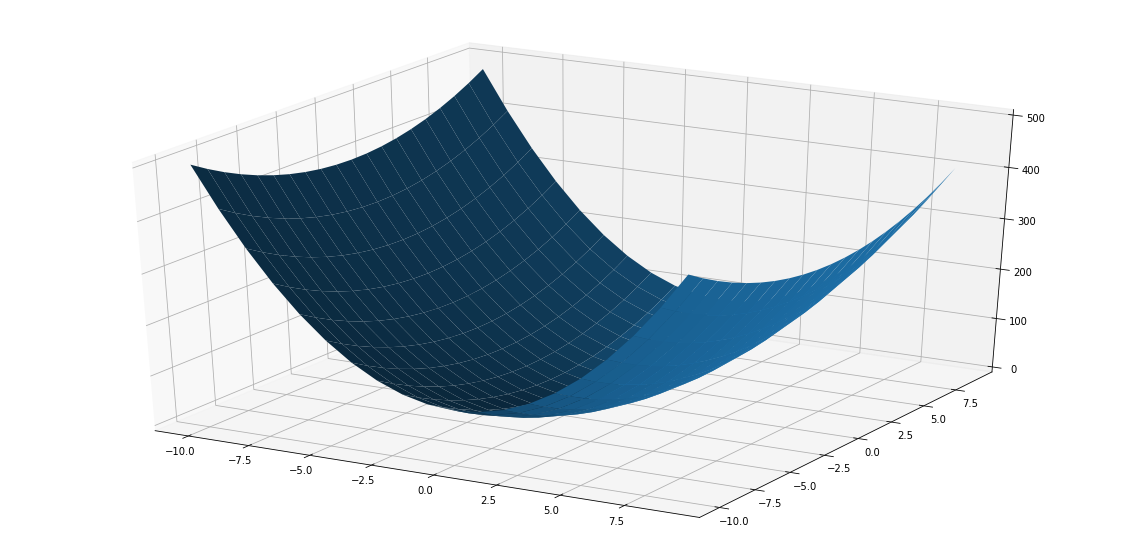

In [12]:
draw_function(x,y,f)